# Exercise 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set('talk')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

Define the logistic function.
The analytic solution is given by
$$
x_t = \dfrac{x_0 \exp(\lambda t)}{1-x_0+x_0 \exp(\lambda t)}
$$

In [2]:
lamb = 1.

def logistic_ode(t, x, u):
    return lamb * x * (1-x)

In [3]:
def analytical_solution(t,x_0):
    return (x_0*np.exp(lamb*t))/(1-x_0+(x_0*np.exp(lamb*t)))

From the last exercise

In [2]:
def euler(f,t_now, x_now,u_now, dt):
    return x_now + f(t_now, x_now,u_now)*dt

def euler_propagate(f,t, x_init,u,dt):
    x_res = np.zeros((u.shape[0],x_init.shape[0]))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = euler(f,t[i], x_res[i],u[i],dt)
    return x_res

def euler_stochatic_propagate(f,t, x_init,u, w, dt):
    x_res = np.zeros((u.shape[0],x_init.shape[0]))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = euler(f,t[i], x_res[i],u[i],dt) +  w[i]
    return x_res

def rk4(f,t_now, x_now,u_now, dt):
    k1 = f(t_now, x_now,u_now)
    k2 = f(t_now+0.5*dt,x_now+0.5*dt*k1,u_now)
    k3 = f(t_now+0.5*dt, x_now+0.5*dt*k2,u_now)
    k4 = f(t_now+dt, x_now+dt*k3,u_now)
    return x_now+dt*(k1+2*k2+2*k3+k4)/6


def rk4_propagate(f,t, x_init,u,dt):
    x_res = np.zeros((u.shape[0],x_init.shape[0]))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = rk4(f,t[i], x_res[i],u[i],dt)
    return x_res

Set some initial condition and zero input

In [5]:
x_0 = np.array([0.1])
t_0 = 0
t = np.linspace(0,50,101)
dt = t[1]-t[0]
u = 0*t

Compute the analytic, Euler, and Runge Kutta solution

In [6]:
x_euler = euler_propagate(logistic_ode, t, x_0, u, dt)
x_RK = rk4_propagate(logistic_ode, t, x_0, u, dt)
x_analytic = analytical_solution(t,x_0)

Plot

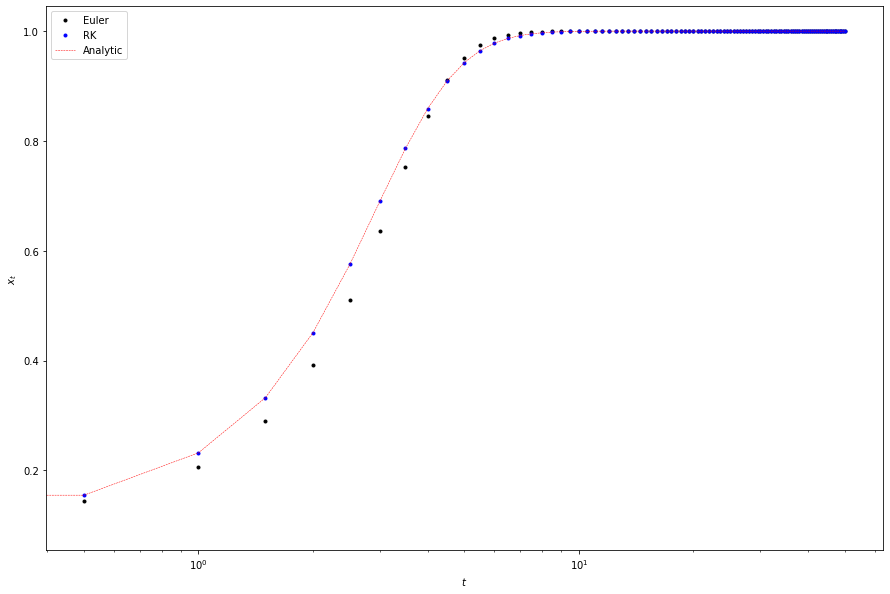

In [7]:
plt.figure(figsize=(15,10))
plt.semilogx(t,x_euler,'.k',label='Euler',linewidth=0.5)
plt.semilogx(t,x_RK,'.b',label='RK',linewidth=0.5)
plt.semilogx(t,x_analytic,'--r',label='Analytic',linewidth=0.5)
plt.xlabel('$t$')
plt.ylabel('$x_t$')
plt.legend()

Robot dynamics

In [3]:
def robot_dynamic(t,x,u):
    return np.array([u[0]*np.cos(x[2]), u[0]*np.sin(x[2]), u[1]])

Redefine the initial position and time.

In [11]:
robot_init = np.array([0.,0.,0.])
t_robot = np.linspace(0.,5.,501)
dt_robot = t_robot[1]-t_robot[0]#
t = np.linspace(0,50,101)
dt_robot = t[1]-t[0]
u_robot = np.zeros((t_robot.shape[0],2))

In [12]:
for i in range(t_robot.shape[0]):
    if 0<= t_robot[i] < 1:
        u_robot[i,0] = t_robot[i]
    elif 1<= t_robot[i] < 4:
        u_robot[i,0] = 1
    else:
        u_robot[i,0] = 5-t_robot[i]
        
    if 0<= t_robot[i] < 2:
        u_robot[i,1] = 0
    elif 2<= t_robot[i] < 3:
        u_robot[i,1] = np.pi/16
    else:
        u_robot[i,1] = 0


In [13]:
x_robot_euler = euler_propagate(robot_dynamic, t_robot, robot_init, u_robot, dt_robot)
x_robot_RK = rk4_propagate(robot_dynamic, t_robot, robot_init, u_robot, dt_robot)

In [7]:
stdev = 0.05
w_robot = stdev*np.random.randn(t_robot.shape[0],robot_init.shape[0])

In [8]:
x_robot_stochastic_euler = euler_stochatic_propagate(robot_dynamic, t_robot, robot_init, u_robot, w_robot, dt_robot)

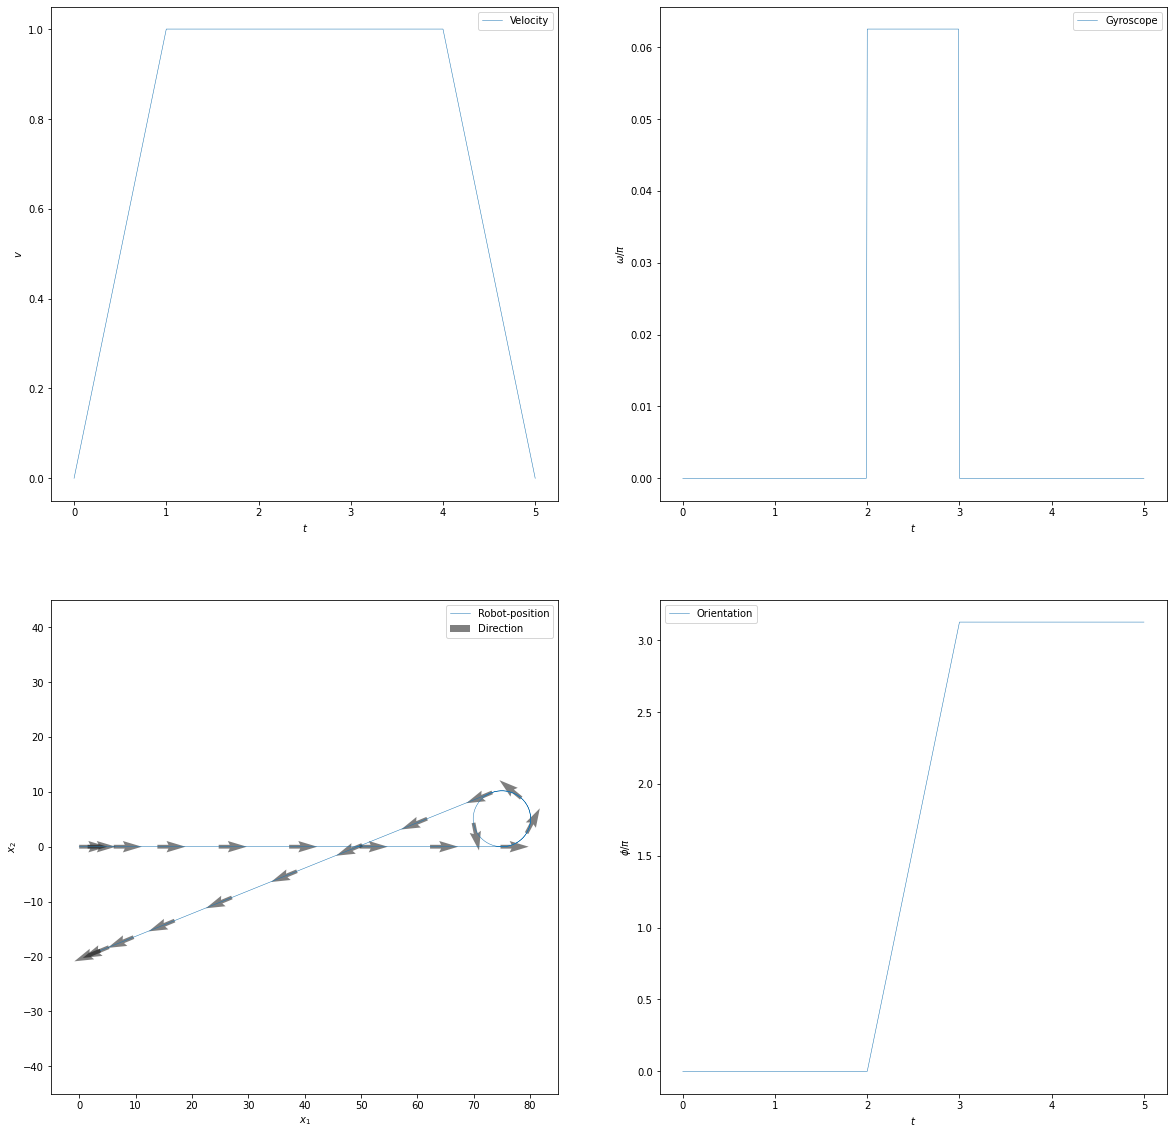

In [14]:
f, ax = plt.subplots(2,2, figsize=(20,20))
skip = 25
ax[0,0].plot(t_robot,u_robot[:,0], label='Velocity', linewidth=0.5)
ax[0,0].set_xlabel('$t$')
ax[0,0].set_ylabel('$v$')
ax[0,0].legend()
ax[0,1].plot(t_robot,u_robot[:,1]/np.pi, label='Gyroscope', linewidth=0.5)
ax[0,1].set_xlabel('$t$')
ax[0,1].set_ylabel('$\omega / \pi$')
ax[0,1].legend()
ax[1,0].plot(x_robot_euler[:,0],x_robot_euler[:,1], label='Robot-position', linewidth=0.5)
ax[1,0].quiver(x_robot_euler[::skip,0],x_robot_euler[::skip,1],
               np.cos(x_robot_euler[::skip,2]),np.sin(x_robot_euler[::skip,2]),
               label='Direction', linewidth=0.5, alpha=0.5)
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
ax[1,0].set_ylim(-45,45)
ax[1,0].set_xlim(-5,85)
ax[1,0].legend()
ax[1,1].plot(t_robot,x_robot_euler[:,2]/np.pi, label='Orientation', linewidth=0.5)
ax[1,1].set_xlabel('$t$')
ax[1,1].set_ylabel('$\phi / \pi$')
ax[1,1].legend()


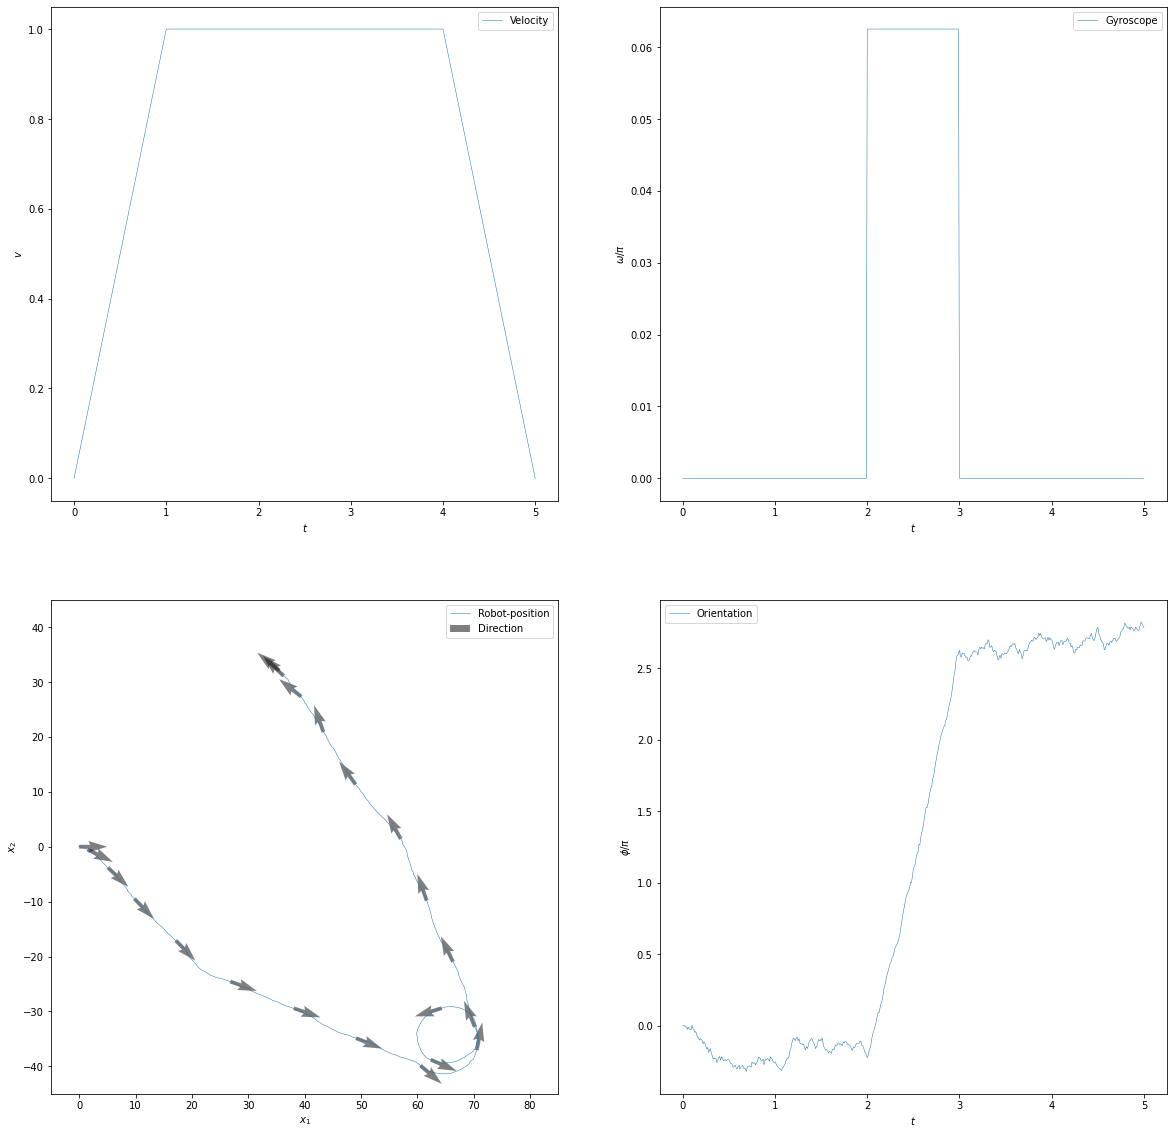

In [17]:
f, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].plot(t_robot,u_robot[:,0], label='Velocity', linewidth=0.5)
ax[0,0].set_xlabel('$t$')
ax[0,0].set_ylabel('$v$')
ax[0,0].legend()
ax[0,1].plot(t_robot,u_robot[:,1]/np.pi, label='Gyroscope', linewidth=0.5)
ax[0,1].set_xlabel('$t$')
ax[0,1].set_ylabel('$\omega / \pi$')
ax[0,1].legend()
ax[1,0].plot(x_robot_stochastic_euler[:,0],x_robot_stochastic_euler[:,1], label='Robot-position', linewidth=0.5)
ax[1,0].quiver(x_robot_stochastic_euler[::skip,0],x_robot_stochastic_euler[::skip,1],
               np.cos(x_robot_stochastic_euler[::skip,2]),np.sin(x_robot_stochastic_euler[::skip,2]),
               label='Direction', linewidth=0.5, alpha=0.5)
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
ax[1,0].set_ylim(-45,45)
ax[1,0].set_xlim(-5,85)
ax[1,0].legend()
ax[1,1].plot(t_robot,x_robot_stochastic_euler[:,2]/np.pi, label='Orientation', linewidth=0.5)
ax[1,1].set_xlabel('$t$')
ax[1,1].set_ylabel('$\phi / \pi$')
ax[1,1].legend()

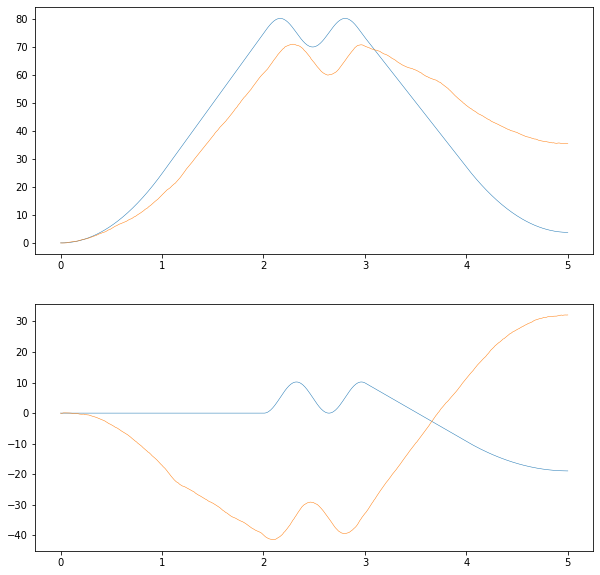

In [18]:
f, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(t_robot,x_robot_euler[:,0],t_robot,x_robot_stochastic_euler[:,0], linewidth=0.5)
ax[1].plot(t_robot,x_robot_euler[:,1],t_robot,x_robot_stochastic_euler[:,1], linewidth=0.5)